# Library Imports

In [248]:
import pandas as pd
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn import linear_model
from factor_analyzer import FactorAnalyzer
import seaborn as sns
import glob
import os
import sys

# Dataframe Construction from Transcript Data

In [586]:
df = pd.read_csv('\\Users\\ABreland\\Downloads\\LIHC_BRCA_data_with_FPKM.txt', sep='\t')
labels = []
count = 0
for name in df.columns:
    if len(name) > 3:
        count += 1
        labels.append(name[-7:] + '_' + str(count))
        df.rename(columns={name:name[-7:]}, inplace=True)
        
df = df.T
df.columns = list(df.loc['ID'])
df = df.drop(index='ID')
df.head()

,a100130426,a100133144,a100134869,a10357,a10431,a136542,a155060,a26823,a280660,a317712,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
LIHC_TP,0.0,2.31,5.69,138.3,1561.0,0.0,217.0,1.0,0.0,0.0,...,38.0,420.0,1219.0,28.0,766.0,4869.0,1366.0,783.0,6.0,10.0
LIHC_TP,0.0,53.59,5.41,144.07,1297.0,0.0,249.0,3.0,0.0,0.0,...,139.0,1284.0,2341.0,145.0,2030.0,10756.0,1533.0,1746.0,13.0,980.0
LIHC_TP,0.0,6.86,6.14,73.93,1423.0,0.0,336.0,1.0,0.0,0.0,...,22.0,342.0,1379.0,11.0,1129.0,3708.0,1606.0,412.0,3.0,3.0
LIHC_NT,0.0,2.0,0.0,103.92,1454.0,0.0,32.0,0.0,0.0,0.0,...,42.0,675.0,679.0,67.0,1942.0,2799.0,493.0,486.0,14.0,167.0
LIHC_NT,0.0,1.41,2.59,96.89,1125.0,0.0,7.0,0.0,0.0,0.0,...,24.0,522.0,863.0,8.0,947.0,1661.0,320.0,694.0,2.0,68.0


## Data represents FPKM expression rates of liver and breast tissue samples, with seperate samples for cancerous tissues and normal tissues.

## Transcript ID list

In [3]:
trans_ids = list(df.columns)
trans_ids[:5]

['a100130426', 'a100133144', 'a100134869', 'a10357', 'a10431']

## Tissue Sample Labels

In [4]:
sample_labels = list(df.index)
sample_labels

['LIHC_TP',
 'LIHC_TP',
 'LIHC_TP',
 'LIHC_NT',
 'LIHC_NT',
 'LIHC_NT',
 'BRCA_TP',
 'BRCA_TP',
 'BRCA_TP',
 'BRCA_NT',
 'BRCA_NT',
 'BRCA_NT']

---
# Principal Component Analysis
---

In [5]:
data = df.reset_index()
data = data.drop(columns='index')

data.head()

,a100130426,a100133144,a100134869,a10357,a10431,a136542,a155060,a26823,a280660,a317712,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0.0,2.31,5.69,138.3,1561.0,0.0,217.0,1.0,0.0,0.0,...,38.0,420.0,1219.0,28.0,766.0,4869.0,1366.0,783.0,6.0,10.0
1,0.0,53.59,5.41,144.07,1297.0,0.0,249.0,3.0,0.0,0.0,...,139.0,1284.0,2341.0,145.0,2030.0,10756.0,1533.0,1746.0,13.0,980.0
2,0.0,6.86,6.14,73.93,1423.0,0.0,336.0,1.0,0.0,0.0,...,22.0,342.0,1379.0,11.0,1129.0,3708.0,1606.0,412.0,3.0,3.0
3,0.0,2.0,0.0,103.92,1454.0,0.0,32.0,0.0,0.0,0.0,...,42.0,675.0,679.0,67.0,1942.0,2799.0,493.0,486.0,14.0,167.0
4,0.0,1.41,2.59,96.89,1125.0,0.0,7.0,0.0,0.0,0.0,...,24.0,522.0,863.0,8.0,947.0,1661.0,320.0,694.0,2.0,68.0


## Scaling of Expression Data

In [6]:
x = scale(data)

## Building and Fitting PCA Model

In [7]:
pca = PCA(n_components=10, whiten=True)
pca.fit(x)
scores = pca.transform(x)

## Components Variance

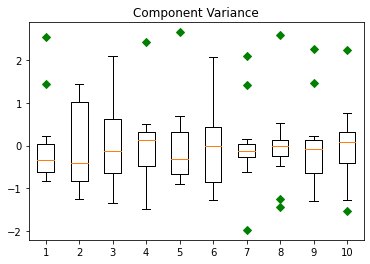

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_title('Component Variance')
ax1.boxplot(scores, 0, 'gD')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

## Variance Explained By Increasing Number of Components

In [9]:
pca.explained_variance_ratio_

array([0.24769892, 0.20386488, 0.12888252, 0.111109  , 0.07419129,
       0.06716653, 0.05822752, 0.04066199, 0.02574303, 0.02407995])

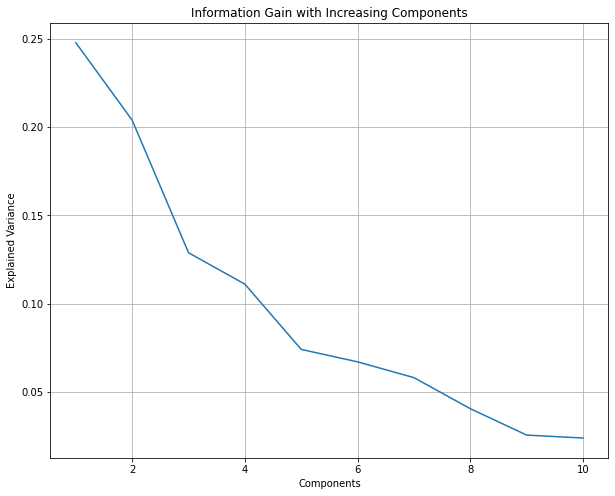

In [10]:
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.title('Information Gain with Increasing Components')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

**Lack of significant information gained beyond 4 components**

## Rebuilding Model with Four Components

In [11]:
pca = PCA(n_components=4, whiten=True)
pca.fit(x)
scores = pca.transform(x)

In [12]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4'])
scores_df['Sample'] = sample_labels
scores_df

,PC1,PC2,PC3,PC4,Sample
0,1.443495,0.053932,-0.619421,2.417478,LIHC_TP
1,2.530765,-0.407350,1.037122,-1.180660,LIHC_TP
2,0.215998,0.926693,-0.428466,-0.910564,LIHC_TP
3,-0.396002,1.450475,-0.093784,-0.341009,LIHC_NT
4,-0.616752,1.315078,-0.156571,-0.156254,LIHC_NT
5,-0.034702,1.401629,-0.104001,0.097524,LIHC_NT
6,-0.258812,-1.263276,-1.183998,-1.487084,BRCA_TP
7,-0.270753,-0.822774,-1.341815,0.282670,BRCA_TP
8,-0.450461,-0.855379,-0.693849,0.199076,BRCA_TP
9,-0.609828,-0.840406,0.519306,0.406202,BRCA_NT


**Correlation betweeen sample groups and principal components**

## Components Variance

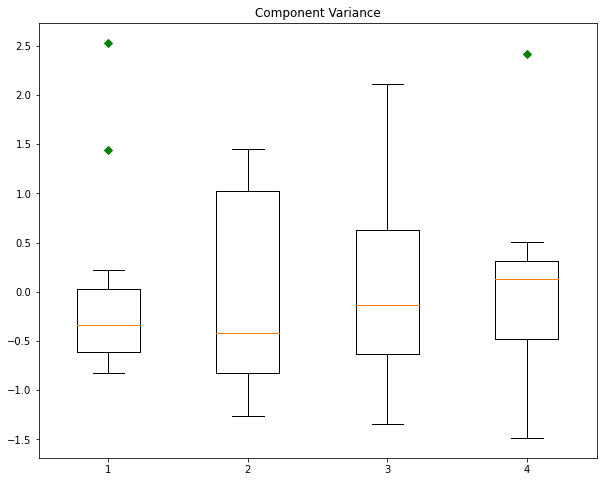

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Component Variance')
ax1.boxplot(scores, 0, 'gD')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

In [14]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
explained_variance

array([0.        , 0.24769892, 0.20386488, 0.12888252, 0.111109  ])

In [15]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [16]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3', 'PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.247699,0.248
2,PC2,0.203865,0.452
3,PC3,0.128883,0.581
4,PC4,0.111109,0.692


In [144]:
fig = px.bar(df_explained_variance[1:], 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_explained_variance['PC'],y=df_explained_variance['Cumulative Variance'],marker=dict(size=15, color="LightSeaGreen")))

fig.add_trace(go.Bar(x=df_explained_variance['PC'],y=df_explained_variance['Explained Variance'],marker=dict(color="RoyalBlue")))

fig.show()

## **Correlation between gene expression and principal components**

In [19]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4'], index=trans_ids)
df_loadings

,PC1,PC2,PC3,PC4
a100130426,-0.001228,-0.004114,-0.008439,0.001915
a100133144,0.010662,-0.005141,0.002470,-0.010643
a100134869,0.002084,-0.009870,-0.013754,-0.004691
a10357,0.007210,-0.000684,-0.004817,0.006810
a10431,0.005003,0.011059,-0.002506,0.006383
...,...,...,...,...
ZYX,0.009547,-0.006570,0.003145,-0.001215
ZZEF1,0.002752,-0.009467,0.007081,-0.003225
ZZZ3,0.009044,-0.007529,0.004902,-0.007355
psiTPTE22,-0.006412,-0.005957,0.013750,0.005021


In [20]:
df_loadings.describe()

,PC1,PC2,PC3,PC4
count,20530.000000,20530.000000,20530.000000,20530.000000
mean,0.003556,-0.002523,0.001204,0.000147
std,0.006005,0.006507,0.006875,0.006978
min,-0.010579,-0.015365,-0.015783,-0.018071
25%,-0.001605,-0.007415,-0.003593,-0.005212
50%,0.003397,-0.003516,0.000014,0.000000
75%,0.009061,0.000955,0.005741,0.004052
max,0.014237,0.015470,0.019038,0.019796


# Sample Grouping with Two Components

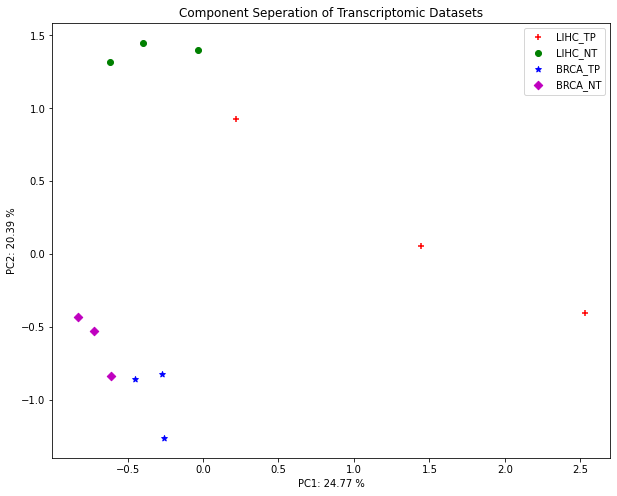

In [21]:
PC1 = 0
PC2 = 1

for i in range(0, scores.shape[0]):
    if sample_labels[i] == 'LIHC_TP':
        c1 = plt.scatter(scores[i,PC1],scores[i,PC2], c='r', marker='+')
    elif sample_labels[i] == 'LIHC_NT':
        c2 = plt.scatter(scores[i,PC1],scores[i,PC2], c='g', marker='o')
    elif sample_labels[i] == 'BRCA_TP':
        c3 = plt.scatter(scores[i,PC1],scores[i,PC2], c='b', marker='*')
    elif sample_labels[i] == 'BRCA_NT':
        c4 = plt.scatter(scores[i,PC1],scores[i,PC2], c='m', marker='D')

#PCA scatterplot:
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT', 'BRCA_TP', 'BRCA_NT'])
plt.xlabel(f'PC1: {round(pca.explained_variance_ratio_[PC1],4)*100} %')
plt.ylabel(f'PC2: {round(pca.explained_variance_ratio_[PC2],4)*100} %')
plt.title('Component Seperation of Transcriptomic Datasets')
plt.show()

# Sample Grouping with Three Components

In [149]:
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3', title='Clustering of Samples with Three Principal Components',
              color='Sample',
              symbol='Sample',
              opacity=0.5)

fig.update_layout(template='plotly_dark')

## Clustering of different sample groups Indicate promise for differentiating cancer and normal tissues based on transcriptomic data utilizing three components.

---
# Selection of Transcripts with High Correlation with Principal Components
---

In [455]:
PC1_loading_scores = pd.DataFrame(df_loadings.sort_values(by=['PC1'], ascending=False))
PC2_loading_scores = pd.DataFrame(df_loadings.sort_values(by=['PC2'], ascending=False))
PC3_loading_scores = pd.DataFrame(df_loadings.sort_values(by=['PC3'], ascending=False))

top_load = pd.concat([PC1_loading_scores[:25], PC2_loading_scores[:25], PC3_loading_scores[:25], PC1_loading_scores[-25:], PC2_loading_scores[-25:], PC3_loading_scores[-25:]])
top_load = top_load.drop(columns='PC4')
top_load

,PC1,PC2,PC3
GARS,0.014237,-0.000626,0.002381
C2orf56,0.014225,0.000975,0.001566
KRTAP5-6,0.014220,-0.000629,0.001719
PLOD3,0.014197,-0.001889,-0.000270
PIGM,0.014188,-0.000701,-0.001427
...,...,...,...
CAMK4,-0.002051,-0.002883,-0.015128
SBNO2,0.000784,-0.009032,-0.015181
ZNF579,0.005600,-0.004690,-0.015494
CCDC106,0.001807,0.005195,-0.015507


In [456]:
cand_trans = top_load.index
cand_trans

Index(['GARS', 'C2orf56', 'KRTAP5-6', 'PLOD3', 'PIGM', 'MGAT4B', 'FBXO22',
       'PABPC4', 'FAM103A1', 'SPNS1',
       ...
       'LOC100128788', 'C19orf71', 'NUPL1', 'ZNF837', 'ZNF446', 'CAMK4',
       'SBNO2', 'ZNF579', 'CCDC106', 'KLHDC9'],
      dtype='object', length=150)

---
# Grouping of Transcripts with Three Components
---

In [609]:
loadings_label = cand_trans
fig = px.scatter_3d(top_load, x='PC1', y='PC2', z='PC3', text = top_load.index, opacity = 0.5, title = 'Correlation Between Transcripts and Principal Components')
fig.update_layout(template='plotly_dark')

fig.show()

---
# Factor Regeression Analysis
---

## Dataframe with Trancripts that Alligned Closely with Principal Components

In [26]:
cand_df = df[df.columns.intersection(cand_trans)]
cand_df.head()

,a8225,ACADS,ADH7,ADI1,ALB,ALDOB,ANXA10,ARHGAP26,ASPG,B4GALNT4,...,TXNL4A,UFSP2,YAP1,ZNF169,ZNF446,ZNF487,ZNF579,ZNF660,ZNF837,ZRSR2
LIHC_TP,1973.0,2024.0,1.0,6863.0,2616135.0,20974.0,143.0,313.0,571.0,4.0,...,1965.0,733.25,1948.0,75.0,323.01,12.0,441.0,1.0,128.0,350.0
LIHC_TP,2600.0,3360.0,41.0,11969.0,14225.0,119819.0,163.0,572.0,19.0,4.0,...,2562.0,816.45,3751.0,83.0,283.05,10.0,298.0,2.0,81.0,313.0
LIHC_TP,894.0,5677.0,2.0,24339.0,3075269.03,297083.0,943.0,361.0,2513.0,892.0,...,1246.0,456.33,928.0,9.0,396.58,17.0,260.0,10.0,114.0,111.0
LIHC_NT,634.0,8063.0,10.0,25176.0,5237978.0,383208.0,1502.0,257.0,2030.0,9.0,...,887.0,555.66,1980.0,9.0,152.02,21.0,163.0,4.0,71.0,123.0
LIHC_NT,584.0,5823.0,4.0,23076.0,5890151.41,312417.0,1646.0,289.0,2522.0,2.0,...,761.0,519.39,2490.0,15.0,251.8,18.0,159.0,4.0,81.0,97.0


## Normalization of Transcript Expression Data

In [27]:
df_norm = pd.DataFrame(scale(cand_df), columns=cand_df.columns)
df_norm = df_norm.set_index(cand_df.index)
df_norm.head()

,a8225,ACADS,ADH7,ADI1,ALB,ALDOB,ANXA10,ARHGAP26,ASPG,B4GALNT4,...,TXNL4A,UFSP2,YAP1,ZNF169,ZNF446,ZNF487,ZNF579,ZNF660,ZNF837,ZRSR2
LIHC_TP,1.644853,-0.401061,-0.800385,-0.369191,0.319822,-0.662108,-0.527839,-0.366041,-0.213659,-0.729875,...,1.468608,0.307197,-0.324984,0.499538,0.214534,-1.249601,1.243840,-1.283408,1.568351,0.471859
LIHC_TP,2.636679,0.035861,1.189426,0.099641,-0.781255,-0.055293,-0.497766,0.834204,-0.745114,-0.729875,...,2.626468,0.651385,0.736944,0.731118,-0.093703,-1.457291,0.201343,-1.095444,0.089718,0.170023
LIHC_TP,-0.061974,0.793606,-0.750639,1.235450,0.514119,1.032942,0.675079,-0.143602,1.656062,0.483904,...,0.074134,-0.838385,-0.925742,-1.410996,0.782026,-0.730375,-0.075684,0.408275,1.127907,-1.477838
LIHC_NT,-0.473257,1.573917,-0.352677,1.312303,1.429335,1.561669,1.515619,-0.625553,1.191039,-0.723040,...,-0.622133,-0.427470,-0.306137,-1.410996,-1.104420,-0.314994,-0.782833,-0.719514,-0.224885,-1.379946
LIHC_NT,-0.552350,0.841353,-0.651149,1.119482,1.705322,1.127078,1.732144,-0.477261,1.664728,-0.732608,...,-0.866506,-0.577514,-0.005758,-1.237311,-0.334754,-0.626529,-0.811994,-0.719514,0.089718,-1.592047


In [445]:
fact_ana = df_norm

sample_dict = {'LiHC_TP': 1, 'LIHC_NT': 0, 'BRCA_TP': 3, 'BRCA_NT': 2}
group = [1, 1, 1, 0, 0, 0, 3, 3, 3, 2, 2, 2]

fact_ana['group'] = group
fact_ana = fact_ana.reset_index()
fact_ana = fact_ana.drop(columns='index')

fact_ana.head()

,a8225,ACADS,ADH7,ADI1,ALB,ALDOB,ANXA10,ARHGAP26,ASPG,B4GALNT4,...,UFSP2,YAP1,ZNF169,ZNF446,ZNF487,ZNF579,ZNF660,ZNF837,ZRSR2,group
0,1.644853,-0.401061,-0.800385,-0.369191,0.319822,-0.662108,-0.527839,-0.366041,-0.213659,-0.729875,...,0.307197,-0.324984,0.499538,0.214534,-1.249601,1.243840,-1.283408,1.568351,0.471859,1
1,2.636679,0.035861,1.189426,0.099641,-0.781255,-0.055293,-0.497766,0.834204,-0.745114,-0.729875,...,0.651385,0.736944,0.731118,-0.093703,-1.457291,0.201343,-1.095444,0.089718,0.170023,1
2,-0.061974,0.793606,-0.750639,1.235450,0.514119,1.032942,0.675079,-0.143602,1.656062,0.483904,...,-0.838385,-0.925742,-1.410996,0.782026,-0.730375,-0.075684,0.408275,1.127907,-1.477838,1
3,-0.473257,1.573917,-0.352677,1.312303,1.429335,1.561669,1.515619,-0.625553,1.191039,-0.723040,...,-0.427470,-0.306137,-1.410996,-1.104420,-0.314994,-0.782833,-0.719514,-0.224885,-1.379946,0
4,-0.552350,0.841353,-0.651149,1.119482,1.705322,1.127078,1.732144,-0.477261,1.664728,-0.732608,...,-0.577514,-0.005758,-1.237311,-0.334754,-0.626529,-0.811994,-0.719514,0.089718,-1.592047,0


## Correlation Matrix of Entire Dataframe

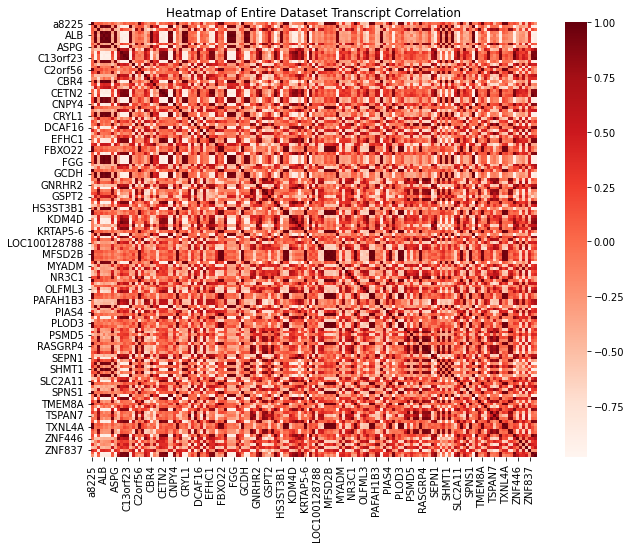

In [449]:
corr = fact_ana.corr()
sns.heatmap(corr, cmap=plt.cm.Reds).set_title('Heatmap of Entire Dataset Transcript Correlation')

plt.show()

## Correlation Matrix of Liver Tissue Samples

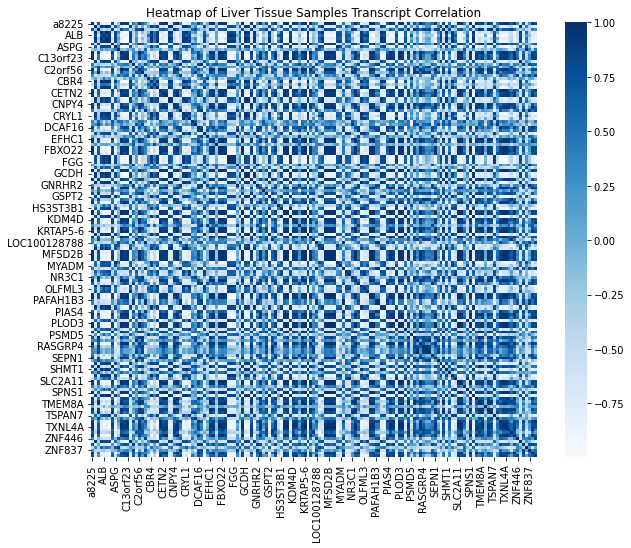

In [450]:
corr = fact_ana[:6].corr()
sns.heatmap(corr, cmap=plt.cm.Blues).set_title('Heatmap of Liver Tissue Samples Transcript Correlation')

plt.show()

---
# Top Liver Cancer Biomarker Candidates
---

In [34]:
LIHC_markers = pd.DataFrame(fact_ana[:6].corr()['group'])
LIHC_markers.sort_values(by='group', ascending=False)[1:]

,group
TTLL3,0.936008
KIAA1797,0.928699
CEP290,0.898418
PIP5K1C,0.894789
C13orf23,0.893816
...,...
FGB,-0.919236
CPN1,-0.931713
DLG2,-0.934239
CXCL12,-0.942535


## Expression of Top Biomarkers Upregulated in  Cancerous Tissue

In [587]:
fig = px.bar(df, x = labels[:6], y = df['TTLL3'].values[:6], text=df['TTLL3'].values[:6], title='FPKM TTLL3 Expression in Cancerous vs. Normal Liver Tissue', range_y = [0, 800], width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [577]:
fig = px.bar(df, 
             x = labels[:6], y = df['KIAA1797'].values[:6],
             text=df['KIAA1797'].values[:6], title='FPKM KIAA1797 Expression in Cancerous vs Normal Liver Tissue', range_y = [0, 900],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [578]:
fig = px.bar(df, 
             x = labels[:6], y = df['CEP290'].values[:6],
             text=df['CEP290'].values[:6], title='FPKM CEP290 Expression in Cancerous vs. Normal Liver Tissue', range_y = [0, 600],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

## Expression of Top Biomarkers Downregulated in Cancerous Tissues

In [579]:
fig = px.bar(df, 
             x = labels[:6], y = df['CCT6B'].values[:6],
             text=df['CCT6B'].values[:6], title='FPKM CCT6B Expression in Cancerous vs. Normal Liver Tissue', range_y = [0, 150],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [580]:
fig = px.bar(df, 
             x = labels[:6], y = df['CXCL12'].values[:6],
             text=df['CXCL12'].values[:6], title='FPKM CXCL12 Expression in Cancerous vs. Normal Liver Tissue', range_y = [0, 8000],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [581]:
fig = px.bar(df, 
             x = labels[:6], y = df['DLG2'].values[:6],
             text=df['DLG2'].values[:6], title='FPKM DLG2 Expression in Cancerous vs. Normal Liver Tissue', range_y = [0, 100],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

## Correlation Matrix of Breast Tissue Samples

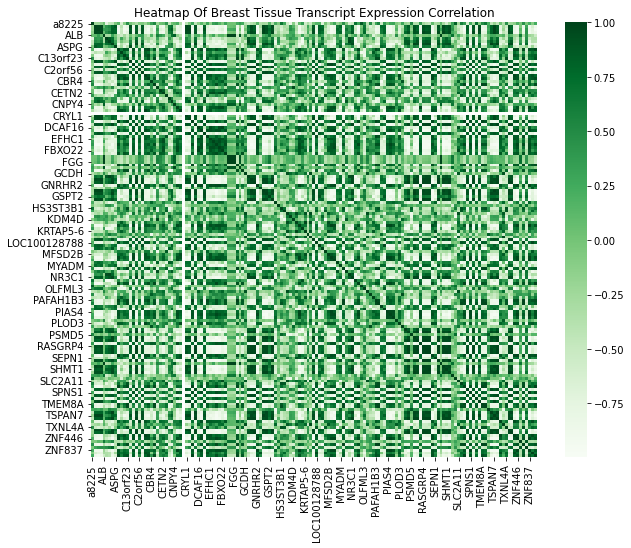

In [451]:
corr = fact_ana[6:].corr()
sns.heatmap(corr, cmap=plt.cm.Greens).set_title('Heatmap Of Breast Tissue Transcript Expression Correlation')
plt.show()

---
# Breast Cancer Biomarker Candidates
---

In [42]:
BRCA_markers = pd.DataFrame(fact_ana[6:].corr()['group'])
BRCA_markers.sort_values(by='group', ascending=False)[1:-1]

,group
CXXC5,0.987883
SOX12,0.986496
NUPL1,0.985125
B4GALNT4,0.964291
CAMK4,0.951330
...,...
TSPAN7,-0.943808
CXCL12,-0.962306
TCF7L1,-0.966915
ADH7,-0.971170


## Expression of Top Biomarkers Upregulated in  Cancerous Tissue

In [588]:
fig = px.bar(df, 
             x = labels[6:], y = df['CXXC5'].values[6:],
             text=df['CXXC5'].values[6:], title='FPKM CXXC5 Expression in Cancerous vs. Normal Breast Tissue', range_y = [0, 2500],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [589]:
fig = px.bar(df, 
             x = labels[6:], y = df['SOX12'].values[6:],
             text=df['SOX12'].values[6:], title='FPKM SOX12 Expression in Cancerous vs. Normal Breast Tissue', range_y = [0, 2500],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [590]:
fig = px.bar(df, 
             x = labels[6:], y = df['NUPL1'].values[6:],
             text=df['NUPL1'].values[6:], title='FPKM NUPL1 Expression in Cancerous vs. Normal Breast Tissue', range_y = [0, 1300],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

## Top Biomarker Expression Downregulated in Cancerous Tissue

In [591]:
fig = px.bar(df, 
             x = labels[6:], y = df['DLG2'].values[6:],
             text=df['DLG2'].values[6:], title='FPKM DLG2 Expression in Cancerous vs. Normal Breast Tissue', range_y = [0, 150],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [592]:
fig = px.bar(df, 
             x = labels[6:], y = df['ADH7'].values[6:],
             text=df['ADH7'].values[6:], title='FPKM ADH7 Expression in Breast Tissue', range_y = [0, 70],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [593]:
fig = px.bar(df, 
             x = labels[6:], y = df['TCF7L1'].values[6:],
             text=df['TCF7L1'].values[6:], title='FPKM TCF7L1 Expression in Breast Tissue', range_y = [0, 1400],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

---
# Sample Grouping with Two Biomarkers
---

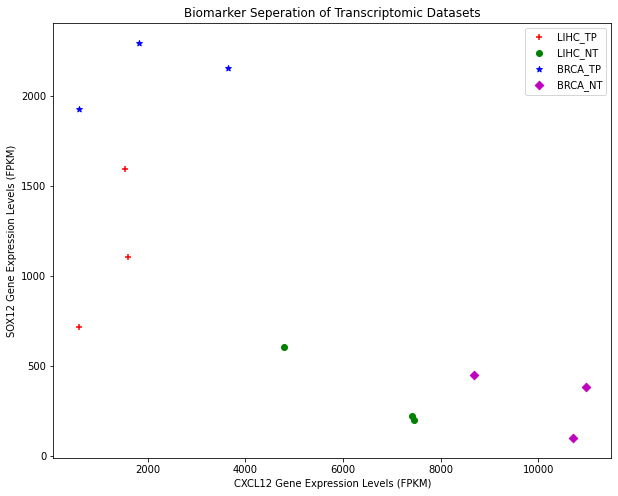

In [594]:
for i in range(len(sample_labels)):
    if sample_labels[i] == 'LIHC_TP':
        c1 = plt.scatter(df['CXCL12'].values[i] ,df['SOX12'].values[i], c='r', marker='+')
    elif sample_labels[i] == 'LIHC_NT':
        c2 = plt.scatter(df['CXCL12'].values[i] ,df['SOX12'].values[i], c='g', marker='o')
    elif sample_labels[i] == 'BRCA_TP':
        c3 = plt.scatter(df['CXCL12'].values[i] ,df['SOX12'].values[i], c='b', marker='*')
    elif sample_labels[i] == 'BRCA_NT':
        c4 = plt.scatter(df['CXCL12'].values[i] ,df['SOX12'].values[i], c='m', marker='D')

#PCA scatterplot:
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT', 'BRCA_TP', 'BRCA_NT'])
plt.xlabel('CXCL12 Gene Expression Levels (FPKM)')
plt.ylabel('SOX12 Gene Expression Levels (FPKM)')
plt.title('Biomarker Seperation of Transcriptomic Datasets')
plt.show()

---
# Determining Biomarker for Seperating Breast and Liver Tissue
---

In [71]:
tiss_ana = pd.concat([cand_df[:3], cand_df[6:9]])
tiss_ana['group'] = [1, 1, 1, 3, 3, 3]
tiss_ana = tiss_ana.reset_index()
tiss_ana = tiss_ana.drop(columns='index')
tiss_ana.head()

,a8225,ACADS,ADH7,ADI1,ALB,ALDOB,ANXA10,ARHGAP26,ASPG,B4GALNT4,...,UFSP2,YAP1,ZNF169,ZNF446,ZNF487,ZNF579,ZNF660,ZNF837,ZRSR2,group
0,1973.0,2024.0,1.0,6863.0,2616135.0,20974.0,143.0,313.0,571.0,4.0,...,733.25,1948.0,75.0,323.01,12.0,441.0,1.0,128.0,350.0,1
1,2600.0,3360.0,41.0,11969.0,14225.0,119819.0,163.0,572.0,19.0,4.0,...,816.45,3751.0,83.0,283.05,10.0,298.0,2.0,81.0,313.0,1
2,894.0,5677.0,2.0,24339.0,3075269.03,297083.0,943.0,361.0,2513.0,892.0,...,456.33,928.0,9.0,396.58,17.0,260.0,10.0,114.0,111.0,1
3,458.3962,167.8488,0.0,554.556,10.3398,9.3058,0.0,247.8097,0.3447,1839.4441,...,332.2821,290.2027,99.9511,518.6943,24.4708,330.8725,7.2378,102.019,421.8624,3
4,657.2983,395.2856,0.0,782.4116,2.7199,0.9066,0.0,130.553,5.4397,1974.6147,...,420.4986,849.5014,102.4479,484.7688,23.5721,548.5041,5.4397,78.8758,470.5349,3


In [73]:
tiss_labels = labels[:3] + labels[6:9]
tiss_labels

['LIHC_TP_1', 'LIHC_TP_2', 'LIHC_TP_3', 'BRCA_TP_7', 'BRCA_TP_8', 'BRCA_TP_9']

## Biomarker Candidates

In [74]:
tiss_markers = pd.DataFrame(pd.DataFrame(scale(tiss_ana), columns=tiss_ana.columns).corr()['group'])
tiss_markers.sort_values(by='group', ascending=False)[1:]

,group
PIP5K1C,0.976022
OSCP1,0.973399
NMUR2,0.972722
PITPNM3,0.952463
EPN2,0.946692
...,...
FGG,-0.899999
CLYBL,-0.918728
CLU,-0.935582
SERPINF2,-0.944685


# Transcript rate in Tissues

In [595]:
fig = px.bar(df, 
             x = tiss_labels , y = tiss_ana['PIP5K1C'].values,
             text=tiss_ana['PIP5K1C'].values, title='FPKM PIP5K1C Expression Breast vs. Liver Cancerous Tissue', range_y = [0, 2200],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [596]:
fig = px.bar(df, 
             x = tiss_labels , y = tiss_ana['OSCP1'].values,
             text=tiss_ana['OSCP1'].values, title='FPKM OSCP1 Expression Breast vs. Liver Cancerous Tissue', range_y = [0, 400],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [597]:
fig = px.bar(df, 
             x = tiss_labels , y = tiss_ana['EPN2'].values,
             text=tiss_ana['EPN2'].values, title='FPKM EPN2 Expression Breast vs. Liver Cancerous Tissue', range_y = [0, 1200],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [598]:
fig = px.bar(df, 
             x = tiss_labels , y = tiss_ana['SERPINF2'].values,
             text=tiss_ana['SERPINF2'].values, title='FPKM SERPINF2 Expression Breast vs. Liver Cancerous Tissue', range_y = [0, 80000],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

---
# Sample Clustering with Optimal Biomarkers
---

In [599]:
fig = px.scatter_3d(cand_df, x='CXCL12', y='SOX12', z='SERPINF2',
              color= cand_df.index,
              symbol= cand_df.index, title='TGCA Sample Clustering with FPKM Transcriptome Expression Rates',
              opacity=0.5)

fig.update_layout(template='plotly_dark')

## Selection of transcript biomarkers led to significant isolation of sample clusters


---
# Biomarker Testing with Raw Read Count
---

## GTEx Raw Liver Gene Expression Data

In [483]:
norm_liver = pd.read_csv("\\Users\\ABreland\\Downloads\\gene_reads_liver.gct", sep = '\t', skiprows= [0, 1])
norm_liver.drop(columns= ['id', 'Name'], inplace=True)
norm_liver.set_index('Description', inplace = True)
norm_liver.head()

,GTEX-11DXY-0526-SM-5EGGQ,GTEX-11DXZ-0126-SM-5EGGY,GTEX-11EQ9-0526-SM-5A5JZ,GTEX-11GSP-0626-SM-5986T,GTEX-11NUK-1226-SM-5P9GM,GTEX-11NV4-1326-SM-5HL6V,GTEX-11OF3-0726-SM-5BC4Z,GTEX-11TT1-1726-SM-5EQLJ,GTEX-11TUW-1726-SM-5BC5C,GTEX-11WQC-0726-SM-5EQMR,...,GTEX-ZF29-2026-SM-DNZYW,GTEX-ZF2S-3026-SM-4WWCH,GTEX-ZPU1-0826-SM-57WG2,GTEX-ZTPG-1426-SM-51MT3,GTEX-ZVP2-0626-SM-51MSO,GTEX-ZVT3-1626-SM-5GU66,GTEX-ZVT4-0626-SM-5E45T,GTEX-ZYT6-0626-SM-5E45V,GTEX-ZYY3-0626-SM-5NQ6W,GTEX-ZZPU-0426-SM-5GZYH
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,1,0,1,3,0,0,0,0,0,0,...,0,0,0,2,5,0,0,1,0,1
WASH7P,81,69,39,56,61,187,98,21,81,101,...,31,45,74,124,81,81,77,40,145,40
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
FAM138A,0,0,0,0,0,1,0,0,1,0,...,0,0,2,0,0,0,1,0,0,0


In [484]:
gene_names = list(norm_liver.index)

In [487]:
for name in norm_liver.columns:
    norm_liver.rename(columns={name:name[:5] + 'Liver'}, inplace=True)
    
columns = list(norm_liver.columns)
columns[:5]

['GTEX-Liver', 'GTEX-Liver', 'GTEX-Liver', 'GTEX-Liver', 'GTEX-Liver']

In [489]:
norm_liver = norm_liver.T
norm_liver.index = columns
norm_liver.columns = gene_names

In [490]:
norm_liver.head()

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-Liver,1,81,0,1,0,0,3,0,1,5,...,3608480,1,3,8,564959,153811,37,1829216,5,1
GTEX-Liver,0,69,0,1,0,2,3,2,8,2,...,1684270,1,2,1,439565,192624,93,990263,1,1
GTEX-Liver,1,39,0,1,0,1,0,1,1,4,...,1956309,3,3,5,400649,142490,61,843511,2,4
GTEX-Liver,3,56,0,0,0,0,5,4,2,0,...,3745154,4,1,5,522722,120446,69,2104116,3,4
GTEX-Liver,0,61,0,1,0,2,3,5,0,4,...,5294518,5,0,2,573241,133766,24,2148804,1,4


## GTEx Raw Breast Gene Expression Data

In [491]:
norm_breast = pd.read_csv("\\Users\\ABreland\\Downloads\\gene_reads_breast_mammary_tissue.gct", sep = '\t', skiprows= [0,1])
norm_breast.drop(columns= ['id', 'Name'], inplace=True)
norm_breast.set_index('Description', inplace = True)
norm_breast.head()

,GTEX-1117F-2826-SM-5GZXL,GTEX-111YS-1926-SM-5GICC,GTEX-1122O-1226-SM-5H113,GTEX-117XS-1926-SM-5GICO,GTEX-117YX-1426-SM-5H12H,GTEX-1192X-2326-SM-5987X,GTEX-11DXW-0626-SM-5N9ER,GTEX-11DXY-2326-SM-5GICW,GTEX-11DXZ-1926-SM-5GZZL,GTEX-11DZ1-0326-SM-5N9BN,...,GTEX-ZVTK-0326-SM-51MRR,GTEX-ZVZQ-0826-SM-51MRF,GTEX-ZWKS-2826-SM-5NQ74,GTEX-ZXES-0826-SM-5E43C,GTEX-ZY6K-1626-SM-5GZWV,GTEX-ZYFC-0826-SM-5E44K,GTEX-ZYT6-0126-SM-5E45J,GTEX-ZYW4-0826-SM-5GIDG,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZPU-0626-SM-5E43T
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
WASH7P,286,135,110,246,44,192,162,116,191,128,...,129,163,183,156,202,250,145,67,96,72
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,1,0,0,1,0,...,3,1,0,1,0,0,1,1,0,1
FAM138A,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,2,0


In [492]:
for name in norm_breast.columns:
    norm_breast.rename(columns={name:name[:5] + 'Breast'}, inplace=True)
    
columns = list(norm_breast.columns)
columns[:5]

['GTEX-Breast', 'GTEX-Breast', 'GTEX-Breast', 'GTEX-Breast', 'GTEX-Breast']

In [493]:
norm_breast = norm_breast.T
norm_breast.index = columns
norm_breast.columns = gene_names

In [494]:
norm_breast.head()

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-Breast,0,286,0,0,0,1,2,0,0,0,...,1012622,1,1,1,110879,19433,4,480357,0,3
GTEX-Breast,1,135,0,0,0,3,2,3,0,14,...,1489681,0,0,2,480823,203701,96,764264,10,2
GTEX-Breast,0,110,0,0,0,0,0,2,0,0,...,1305933,1,1,0,546853,244490,143,796824,2,3
GTEX-Breast,1,246,0,0,0,6,7,2,3,8,...,2374131,5,6,1,337833,68617,35,1485775,2,13
GTEX-Breast,0,44,0,0,0,0,0,1,0,0,...,1433018,0,3,1,293442,123105,37,703494,2,7


In [514]:
norm_tissue = pd.concat([norm_liver[:50], norm_breast[:50]])
norm_tissue.shape

(100, 56200)

---
# Clustering of Raw Read Data using Selected Optimal Biomarkers
---

In [518]:
fig = px.scatter_3d(norm_tissue, x='OSCP1', y='EPN2', z='SERPINF2',
              color= norm_tissue.index,
              symbol= norm_tissue.index, title='Sample Clustering with Normal Tissue Raw Gene Read Counts',
              opacity=0.5)

fig.update_layout(template='plotly_dark')

## SERPINF2, OSCP1, EPN2 all prove to be very useful for differentiating between liver tissue and breast tissue

---
# Testing of Biomarkers on Alternate Cancerous Datasets from TCGA and Median Gene Expression Data for Tissues from GTEx
---

## Collection of All TCGA File Paths

In [387]:
path = '\\Users\\ABreland\\OneDrive\\Documents\\TCGA_LIHC\\'
LIHC_files = os.listdir(path)
for i in range(len(LIHC_files)):
    LIHC_files[i] = path + LIHC_files[i]
    
path = '\\Users\\ABreland\\OneDrive\\Documents\\TCGA_BRCA\\'
BRCA_files = os.listdir(path)
for i in range(len(BRCA_files)):
    BRCA_files[i] = path + BRCA_files[i]
    
list_files = LIHC_files + BRCA_files

len(list_files)

30

## List of Sample Projects for Indexing

In [420]:
sample_list = ['TCGA-LIHC']*15 + ['TGCA-BRCA']*15
sample_list[14:16]

['TCGA-LIHC', 'TGCA-BRCA']

In [388]:
index_list = pd.read_csv(list_files[0], sep = '\t', skiprows= [0]).columns

## Formation of Dataframe with Testing Data

In [389]:
df_list = (pd.read_csv(file, sep = '\t', skiprows= [0]).T for file in list_files)
df_test = pd.concat((df.set_index(index_list) for df in df_list))
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,60654,60655,60656,60657,60658,60659,60660,60661,60662,60663
gene_id,N_unmapped,N_multimapping,N_noFeature,N_ambiguous,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
gene_name,NaN,NaN,NaN,NaN,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
gene_type,NaN,NaN,NaN,NaN,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,...,protein_coding,lncRNA,lncRNA,lncRNA,lncRNA,protein_coding,lncRNA,protein_coding,protein_coding,protein_coding
unstranded,1921406,4541910,4263037,5946817,6636,0,1907,1322,490,351,...,0,0,62,0,0,1,495,0,11,10
stranded_first,1921406,4541910,31840535,1469134,3335,0,955,1152,759,162,...,0,0,38,0,0,1,264,0,3,29


In [394]:
test_col = list((df_test.loc['gene_type'] == 'protein_coding').iloc[0])
len(test_col)

19962

In [391]:
df_test.drop(columns = (i for i in range(len(test_col)) if test_col[i] == False), inplace= True)

## Dataframe with Only Coding Genes

In [392]:
df_test

,4,5,6,7,8,9,10,11,12,13,...,60647,60648,60649,60651,60653,60654,60659,60661,60662,60663
gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACTL10,AC119733.1,AC020765.6,AC010980.1,AC004233.4,AL451106.1,AC008763.4,AC006486.3,AL391628.1,AP006621.6
gene_type,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,...,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding
unstranded,6636,0,1907,1322,490,351,31077,4397,2296,2637,...,0,0,0,0,5,0,1,0,11,10
stranded_first,3335,0,955,1152,759,162,15781,3098,1262,1485,...,0,0,0,0,6,0,1,0,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stranded_first,3048,1,1337,1496,1768,195,800,4250,1492,2742,...,0,0,0,9,1,0,0,0,7,17
stranded_second,3094,0,1272,1466,1823,140,789,4082,1522,2836,...,0,0,0,10,1,0,0,0,7,18
tpm_unstranded,90.8593,0.0455,145.0438,15.374,24.0082,6.6467,13.3614,126.285,18.6635,89.1987,...,0.0,0.0,0.0,0.1357,0.0923,0.0,0.0,0.0,0.0977,0.2396
fpkm_unstranded,27.3476,0.0137,43.6565,4.6274,7.2262,2.0006,4.0216,38.0103,5.6175,26.8478,...,0.0,0.0,0.0,0.0408,0.0278,0.0,0.0,0.0,0.0294,0.0721


In [395]:
gene_names = []
name_list = list(df_test.iloc[1])
len(name_list)

19962

In [396]:
for i in range(len(test_col)):
    if test_col[i] == True:
        gene_names.append(name_list[i])

In [397]:
gene_names[:5]

['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112']

## Filtering Data to Only Keep FPKM Expression Levels

In [398]:
df_test = df_test[(df_test_lihc.index == 'fpkm_unstranded')]
df_test.columns = gene_names

In [414]:
df_test.index = sample_list
df_test.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACTL10,AC119733.1,AC020765.6,AC010980.1,AC004233.4,AL451106.1,AC008763.4,AC006486.3,AL391628.1,AP006621.6
TCGA-LIHC,28.3987,0.0,30.6697,3.7284,1.5933,2.0146,75.5965,30.2458,5.1717,13.4319,...,0.0,0.0,0.0,0.0,0.1335,0.0,0.0049,0.0,0.0222,0.1155
TCGA-LIHC,14.7467,0.0664,13.2948,1.1842,1.5294,1.5874,252.5701,10.6783,9.2919,2.1336,...,0.0,0.0,0.0,0.0198,0.0,0.0,0.0688,0.0,0.0061,0.0816
TCGA-LIHC,17.3426,0.0,26.439,0.8063,0.948,0.2267,18.1693,45.5241,14.8816,4.1245,...,0.0,0.0,0.0,0.0062,0.4018,0.0,0.0,0.0,0.0076,0.163
TCGA-LIHC,14.3394,0.013,49.9151,2.9326,3.7457,2.5001,31.925,41.9136,5.1247,11.7151,...,0.0,0.0,0.0049,0.026,0.0265,0.0,0.0,0.0,0.01,0.2408
TCGA-LIHC,7.5592,0.027,10.2282,0.2372,0.06,7.7717,65.6948,20.7588,4.1774,3.0409,...,0.0,0.0,0.0,0.0,0.1643,0.0,0.0,0.0,0.0,0.403


---
## TCGA Cancerous Tissue Data Clustering
---

In [601]:
fig = px.scatter_3d(df_test, x='SOX12', y='CXCL12', z='SERPINF2', symbol = df_test.index, color = df_test.index,
              title='TCGA Test Sample Clustering with FPKM Gene Expression Rates in Cancerous Tissue',
              opacity=0.5)

fig.update_layout(template='plotly_dark')

---
# Collection of Median Expression Data From GTEx
---

In [530]:
med_tiss = pd.read_csv("\\Users\\ABreland\\Downloads\\GTEx_gene_median_rpkm.gct", sep = '\t', skiprows= [0,1])
med_tiss.head()

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,ENSG00000223972.4,DDX11L1,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,...,0.0,0.00,0.0,0.01884,0.000,0.8229,0.00,0.00,0.00,0.0615
1,ENSG00000227232.4,WASH7P,8.294,7.283,6.109,7.445,7.85,7.266,10.48,4.962,...,13.6,13.66,10.6,13.47000,8.051,12.5400,12.55,13.01,11.36,7.5720
2,ENSG00000243485.2,MIR1302-11,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.1141,0.00,0.00,0.00,0.0000
3,ENSG00000237613.2,FAM138A,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.0000,0.00,0.00,0.00,0.0000
4,ENSG00000268020.2,OR4G4P,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.0000,0.00,0.00,0.00,0.0000


In [531]:
med_tiss.drop(columns = 'Name', inplace = True)
med_tiss.set_index('Description', inplace = True)

In [532]:
med_tiss.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,...,0.0,0.00,0.0,0.01884,0.000,0.8229,0.00,0.00,0.00,0.0615
WASH7P,8.294,7.283,6.109,7.445,7.85,7.266,10.48,4.962,5.554,5.676,...,13.6,13.66,10.6,13.47000,8.051,12.5400,12.55,13.01,11.36,7.5720
MIR1302-11,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.1141,0.00,0.00,0.00,0.0000
FAM138A,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.0000,0.00,0.00,0.00,0.0000
OR4G4P,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00000,0.000,0.0000,0.00,0.00,0.00,0.0000


## Filtering Data to Only Keep Breast and Liver Expression Data

In [533]:
gene_names = med_tiss.index
med_tiss = med_tiss[['Breast - Mammary Tissue', 'Liver']]
med_tiss = med_tiss.T
med_tiss.columns = gene_names
med_tiss.head()

Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Breast - Mammary Tissue,0.0,9.756,0.0,0.0,0.0,0.0,0.0,0.2413,0.0,3.491,...,13460.0,0.0,0.0,0.0,1545.0,1446.0,0.2670,9428.0,0.0,0.0
Liver,0.0,4.836,0.0,0.0,0.0,0.0,0.0,0.1472,0.0,2.096,...,30090.0,0.0,0.0,0.0,3210.0,2871.0,0.3328,17100.0,0.0,0.0


In [534]:
med_tiss.columns = gene_names
med_tiss.index = ['GTEx-Breast', 'GTEx-Liver']
med_tiss.head()

Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEx-Breast,0.0,9.756,0.0,0.0,0.0,0.0,0.0,0.2413,0.0,3.491,...,13460.0,0.0,0.0,0.0,1545.0,1446.0,0.2670,9428.0,0.0,0.0
GTEx-Liver,0.0,4.836,0.0,0.0,0.0,0.0,0.0,0.1472,0.0,2.096,...,30090.0,0.0,0.0,0.0,3210.0,2871.0,0.3328,17100.0,0.0,0.0


In [559]:
test = pd.concat([df_test[['SOX12', 'CXCL12', 'SERPINF2']], med_tiss[['SOX12', 'CXCL12', 'SERPINF2']]])
test

,SOX12,CXCL12,SERPINF2
TCGA-LIHC,11.5716,21.3891,106.5289
TCGA-LIHC,1.4303,39.9891,833.2482
TCGA-LIHC,13.1185,0.1532,376.1873
TCGA-LIHC,72.2547,2.0538,205.4942
TCGA-LIHC,9.9001,0.9699,408.5157
TCGA-LIHC,11.058,1.3177,229.1547
TCGA-LIHC,11.2636,4.1321,81.8023
TCGA-LIHC,9.3249,0.7845,367.4987
TCGA-LIHC,1.1669,1.7975,192.2763
TCGA-LIHC,12.469,5.3932,142.8065


---
# TCGA Test Data Clustering with Median Population Expression Levels
---

In [602]:
fig = px.scatter_3d(test, x='CXCL12', y='SOX12', z='SERPINF2',
              color= test.index,
              symbol= test.index, title='TCGA Test Sample Clustering with Median Expression of Normal Tissue',
              opacity=0.8)

fig.update_layout(template='plotly_dark')

## Overall Median Expression Levels in Cancerous Tissues Compared to Normal Tissues

In [563]:
med_df = pd.concat([pd.DataFrame(test[:15].median()).T, pd.DataFrame(test.iloc[31]).T, pd.DataFrame(test[15:30].median()).T, pd.DataFrame(test.iloc[30]).T])
med_df.index = ['TCGA-LIHC', 'GTEx-Liver', 'TCGA-BRCA', 'GTEx-Breast']
med_df

,SOX12,CXCL12,SERPINF2
TCGA-LIHC,11.058,4.1321,205.4942
GTEx-Liver,1.728,18.38,598.3
TCGA-BRCA,12.222,12.4496,1.2718
GTEx-Breast,2.759,53.77,10.24


---
# Median Expression of All Datasets
---

In [603]:
fig = px.scatter_3d(med_df, x='CXCL12', y='SOX12', z='SERPINF2',
              color= med_df.index,
              symbol= med_df.index, title='Median Expression Levels Cancerous vs. Normal Tissue',
              opacity=0.8)

fig.update_layout(template='plotly_dark')

In [604]:
fig = px.bar(med_df, 
             x = med_df.index[:2] , y = med_df['SERPINF2'].values[:2],
             text=med_df['SERPINF2'].values[:2], title='SERPINF2 Expression Liver Tissue', range_y = [0, 700],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [605]:
fig = px.bar(med_df, 
             x = med_df.index[:2] , y = med_df['SOX12'].values[:2],
             text=med_df['SOX12'].values[:2], title='SOX12 Liver Median Expression Comparison', range_y = [0, 15],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [607]:
fig = px.bar(med_df, 
             x = med_df.index[2:] , y = med_df['SOX12'].values[2:],
             text=med_df['SOX12'].values[2:], title='SOX12 Breast Median Expression Comparison', range_y = [0, 15],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()

In [608]:
fig = px.bar(med_df, 
             x = med_df.index[2:] , y = med_df['CXCL12'].values[2:],
             text=med_df['CXCL12'].values[2:], title='CXCL12 Breast Median Expression Comparison', range_y = [0, 70],
             width=1000, height=500)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.show()